## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил: Дмитрий Монахов 

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [391]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [392]:
def result_mark(weights, marks):
      return int(round(np.sum(weights * marks)))
    # your code here
  

In [393]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [394]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [395]:
def change_array(array: np.array, number: int) -> np.array: 
    array[::3] = number
    return array

    # your code here

In [396]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [397]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

 ### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [398]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
               return np.transpose(np.argwhere(np.abs(array1 - array2) <= precision))[0]
    # your code here

In [399]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [400]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [401]:
def block_matrix(block: np.array) -> np.array:
    return np.concatenate((np.concatenate((block,block)), np.concatenate((block,block))), axis=1)

In [402]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5




Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [403]:
def diag_prod(matrix: np.array) -> int:
    a = matrix.reshape(np.prod(matrix.shape))[::matrix.shape[1] + 1] 
    return np.prod(a[a != 0])
    # your code here

In [404]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [405]:
def normalize(matrix: np.array) -> np.array:
      return (matrix - np.mean(matrix, axis=0)) / (np.std(matrix, axis=0) + np.finfo(float).tiny)
    # your code here

In [406]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [407]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [408]:
def antiderivative(coefs: np.array) -> np.array:
    return np.append((coefs / np.arange(len(coefs), 0, -1)),(0))

In [409]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [410]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [411]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix + matrix.T - np.identity(len(matrix)) * np.diag(matrix)

In [412]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [413]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [414]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.ones((m, b + 1 - a)) @ np.vstack((np.arange(a, b + 1), np.zeros((b - a, b + 1 - a))))
    # your code here

In [415]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [416]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10


Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [417]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.sum(vec1 * vec2) / np.sqrt(np.sum(vec1 * vec1) * np. sum(vec2 * vec2)) 

In [418]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [419]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [420]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [421]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [0]:
file = 'drive/My Drive/IAD/minor2020-iad4-master/hw1/train.csv'
df = pd.read_csv(file) 

In [422]:
df = pd.read_csv('train.csv')

In [423]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [424]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [425]:
df.shape

(891, 12)

### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

* Survived - бинарный
* Pclass - порядковый 
* Name - другое
* Sex - категориальный
* Age - вещественный
* Sibsp - вещественный
* Parch - вещественный
* Ticket - другое
* Fare - вещественный
* Cabin - другое
* Embarked - категориальный

Задача регрессии: предсказывать по факту выживания/нет, порту посадки и классу цену билета(Fare)

Задача классификации: самая очевидная - предсказывать выжил пассажир или нет

Задача кластеризации - разбить на кластеры на основе вероятности выживания

 Признаки Cabin и Ticket можно назвать категориальными, так как они принимают значения из неупорядоченного конечного множества, однако, кажется, они не несут никакого смысла для анализа и странно их относить вообще к какому-то признаку.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

Доля выживших



In [426]:
sum(df['Survived']) / df.shape[0]  

0.3838383838383838

Доля мужчин

In [427]:
sum(df[df['Sex'] == 'male']['Survived']) / sum(df['Survived']) 


0.31871345029239767

In [428]:
sum(df[df['Sex'] == 'female']['Survived']) / sum(df['Survived'])
#доля женщин 

0.6812865497076024

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [429]:
df['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

Самый многолюдный класс - третий

In [430]:
a = df[df['Pclass'] == 3]['Sex'].value_counts()
a

male      347
female    144
Name: Sex, dtype: int64

Очевидно, мужчин было больше

In [431]:
print('men' * (a[0] > a[1]), 'women' * (a[1] > a[0]), 'equal' * (a[1] == a[0])) 

men  


C:\Users\79151\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """Entry point for launching an IPython kernel.


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [432]:
min(df['Fare']) 

0.0

In [433]:
max(df['Fare'])

512.3292

In [434]:
np.mean(df['Fare'])

32.2042079685746

In [435]:
min(df['Fare'][df['Embarked'] == 'S']) 

0.0

In [436]:
max(df['Fare'][df['Embarked'] == 'S']) 

263.0

In [437]:
np.mean(df['Fare'][df['Embarked'] == 'S']) 

27.07981180124218

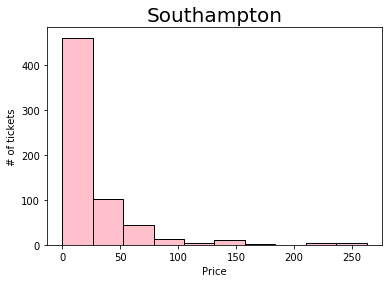

In [438]:

plt.hist(df['Fare'][df['Embarked'] == 'S'], bins = 10, color='pink' ,ec='black')
plt.title('Southampton', fontsize=20 ) 
plt.xlabel('Price') 
plt.ylabel('# of tickets')
plt.show() 

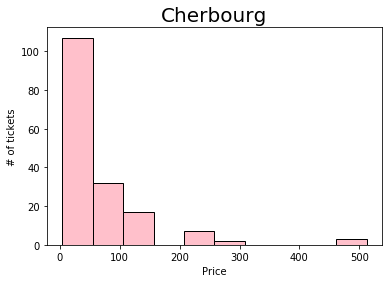

In [439]:
plt.hist(df['Fare'][df['Embarked'] == 'C'], bins = 10, color='pink' ,ec='black')
plt.title('Cherbourg', fontsize=20 ) 
plt.xlabel('Price') 
plt.ylabel('# of tickets')
plt.show() 

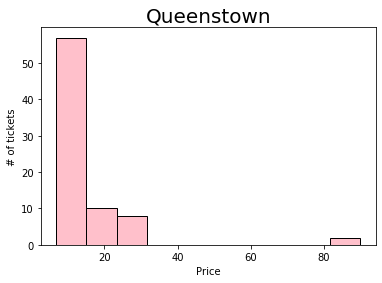

In [440]:
plt.hist(df['Fare'][df['Embarked'] == 'Q'], bins = 10,color='pink' ,ec='black')
plt.title('Queenstown', fontsize=20 ) 
plt.xlabel('Price') 
plt.ylabel('# of tickets')
plt.show() 

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Номер билета и номер каюты не несут полезной информации, так как без дополнительного знания(у нас его нет), являются случайным набором символов, который сам по себе не может повлиять на предсказания или классификацию/кластеризацию пассажиров. Полезными эти признаки могли бы быть, если бы по номеру каюты можно было, например, определить, на какой она палубе или сколько человек в ней размещается.


In [441]:
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [442]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

Видим, что в столбцах Age и Embarked есть пропуски 



In [443]:
df['Age'].isnull().sum()

177

In [444]:
df['Embarked'].isnull().sum()

2

В столбце Age 100 пропусков, в столбце Embarked - 2

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

C:\Users\79151\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\79151\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age distribution')

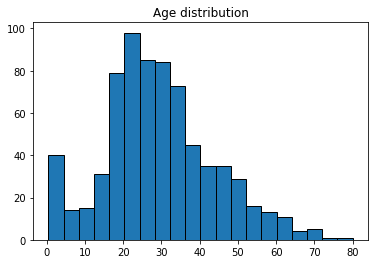

In [445]:
plt.hist(df['Age'], bins=20, ec='black')
plt.title('Age distribution')

Очень хотелось дополнить нормальным, но как-то совсем не нормальное. Попробуем построить что-то вроде эмпирической таблицы распределения(соотнесем вероятности со значениями) и дополнить из нее. Тут приходится использовать предположение, что рост распределен дискретно, но выводить функцию плотности слишком сложно и задание, наверное, не на это


In [446]:
prob = (df['Age'].value_counts().sort_index() / df['Age'].value_counts().sum()).values
weight = (df['Age'].value_counts().sort_index() / df['Age'].value_counts().sum()).index

In [447]:
np.random.seed(12)
a = np.random.choice(weight, size=177, p=prob)

In [448]:
b = df[df['Age'].isnull() == True].index

In [449]:
fill = dict(zip(b,a))
df1 = df
df1['Age'].fillna(value=fill, inplace=True)

Проверяем, что получилось

In [450]:
df1['Age'].isnull().any()

False

Text(0.5, 1.0, 'New age distribution')

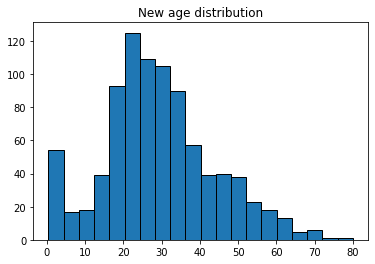

In [451]:
plt.hist(df1['Age'], bins=20, ec='black')
plt.title('New age distribution')

Графики почти одинаковые, распределение не сломали

In [452]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Так как в этом столбце всего 2 пропуска из более чем 800 строк, на их место вставим самое частое значение из этого столбца

In [453]:
df1['Embarked'].fillna(value='S', inplace=True)
df1.isnull().any().any()

False

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [454]:
np.corrcoef(df1['Age'], df1['Fare'])

array([[1.        , 0.08314319],
       [0.08314319, 1.        ]])

Corr(Age, Fare) = 0.08314319 




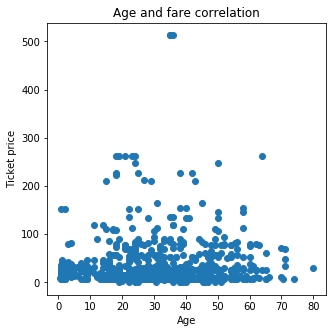

In [455]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df1['Age'], df1['Fare'], alpha=1)
plt.xlabel('Age')
plt.ylabel('Ticket price')
plt.title('Age and fare correlation')
plt.show()

Уберем выбросы и увеличим график


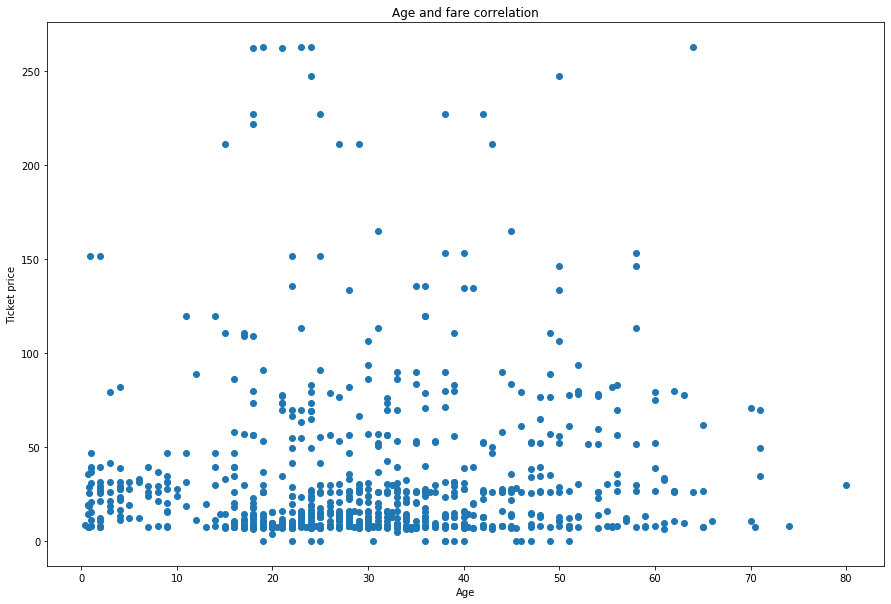

In [456]:
df2 = df1.drop(df1.index[df['Fare'] > 400].tolist())
fig = plt.figure(figsize=(15,10))
plt.scatter(df2['Age'], df2['Fare'])
plt.xlabel('Age')
plt.ylabel('Ticket price')
plt.title('Age and fare correlation')
plt.show()

Очевидно, корреляции почти нет, как и красивого графика

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [457]:
np.corrcoef(df['Fare'], df['Survived'])

array([[1.        , 0.25730652],
       [0.25730652, 1.        ]])

Существует некая корреляция между ценой билета и вероятностью выжить

Разделим стоимость билетов на квантили и посмотрим, видна ли зависимость

In [458]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [459]:
df[df['Fare'] <= 7.91]['Survived'].sum()/df[df['Fare'] <= 7.91].shape[0] 

0.19730941704035873

In [460]:
df[(df['Fare'] <= 14.45) & (df['Fare'] > 7.91)]['Survived'].sum()/df[(df['Fare'] <= 14.45) & (df['Fare'] > 7.91)].shape[0]

0.3087557603686636

In [461]:
df[(df['Fare'] <= 31) & (df['Fare'] > 14.45)]['Survived'].sum()/df[(df['Fare'] <= 31) & (df['Fare'] > 14.45)].shape[0]

0.44541484716157204

In [462]:
df[df['Fare'] >= 31]['Survived'].sum()/df[df['Fare'] >= 31].shape[0]

0.5822222222222222

Видно, что с увеличением стоимости билета вероятность выжить растет от 19.7% до 58%

Аналогично делаем для параметра Pclass, однако тут уже пассажиры разбиты на группы и не надо использовать квантили

In [466]:
np.corrcoef(df['Pclass'], df['Survived'])

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

Корреляция опять присутствует, даже более высокая, чем в прошлом случае. При этом она отрицательная, чем больше номер класса(класс хуже), тем ниже вероятность выживания

In [467]:
df[df['Pclass'] == 3]['Survived'].sum()/df[df['Pclass'] == 3].shape[0] 

0.24236252545824846

In [468]:
df[df['Pclass'] == 2]['Survived'].sum()/df[df['Pclass'] == 2].shape[0] 

0.47282608695652173

In [469]:
df[df['Pclass'] == 1]['Survived'].sum()/df[df['Pclass'] == 1].shape[0] 

0.6296296296296297

Опять зависимость совпадает с полученной при анализе цены на билет

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [470]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Пойдем очевидным путем и добавим бинарный признак, отвечающий за то, путешествовал пассажир один или нет. Он будет принимать значение 1, если признак Family принимает значение 1 и 0 в остальных случаях.

In [471]:
def intt(x):
    return int(x)

In [472]:
df['Alone'] = (df['Family'] == 1).apply(intt)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,38.0,1,2,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [473]:
def sp(x):
    return x.split(',')[0]

In [475]:
df['Name'].apply(sp).value_counts()

Andersson    9
Sage         7
Johnson      6
Carter       6
Panula       6
            ..
Watson       1
Levy         1
Cairns       1
Abbing       1
Tornquist    1
Name: Name, Length: 667, dtype: int64

Кстати, самая популярная фамилия - Андерссон

В качестве интересного задания посчитаем количество молодых свободных девушек на корабле, к которым будет не страшно подойти познакомиться, то есть это значит, что они должны путешествовать одни и в их имени должно быть соответствующее обращение - Miss

In [478]:
def sp1(x):
    return 'Miss.' in x.split()

In [479]:
 df1[(df1['Name'].apply(sp1)) & (df1['Family'] == 1) & (df['Age'] >= 16) & (df['Age'] <= 25)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,7.8792,Q,1,1
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,10.5000,S,1,1
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,18.0,0,0,7.7875,Q,1,1
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,10.5000,S,1,1
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,7.6500,S,1,1
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,14.4583,C,1,1
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,7.7500,S,1,1
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,7.7333,Q,1,1
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,25.0,0,0,7.7500,Q,1,1
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,13.0000,S,1,1


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Text(0.5, 1.0, 'Parch hist')

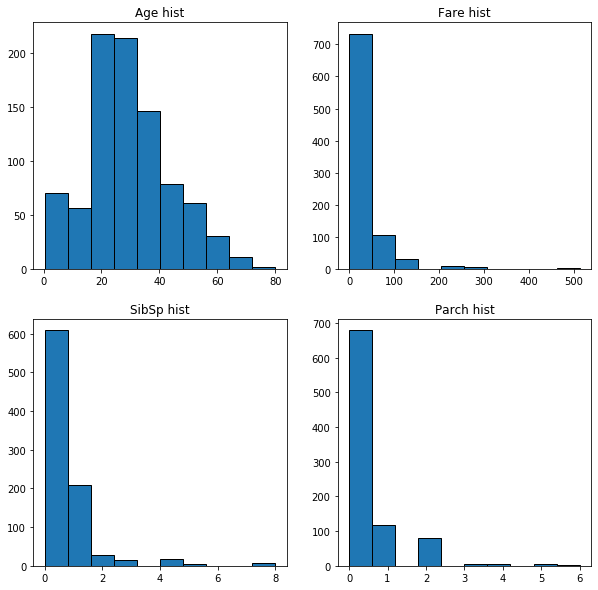

In [480]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].hist(df1['Age'], ec='black', bins=10)
ax[0][0].set_title('Age hist')

ax[0][1].hist(df['Fare'], ec='black', bins=10)
ax[0][1].set_title('Fare hist')

ax[1][0].hist(df['SibSp'], ec='black', bins=10)
ax[1][0].set_title('SibSp hist')

ax[1][1].hist(df['Parch'], ec='black', bins=10)
ax[1][1].set_title('Parch hist')

На гистограммах значение признака отложено на оси х, на оси у отложено количество пассажиров. 

Основное отличие распределения признаков - разные шкалы их измерения, если количество детей и родителей принимает значения от 0 до 6, то стоимость билета может быть от 0 до 100. Для лучшей визуализации этих различий объединим оси на графиках.

Text(0.5, 1.0, 'Parch hist')

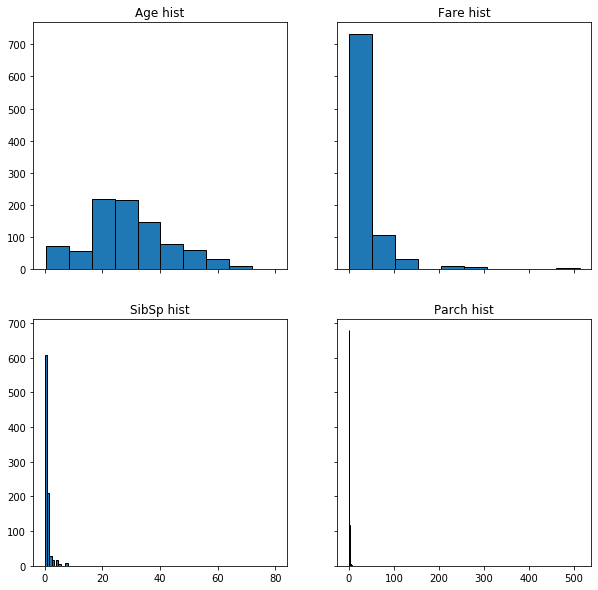

In [482]:
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex='col', sharey='row')

ax[0][0].hist(df1['Age'], ec='black', bins=10)
ax[0][0].set_title('Age hist')

ax[0][1].hist(df['Fare'], ec='black', bins=10)
ax[0][1].set_title('Fare hist')

ax[1][0].hist(df['SibSp'], ec='black', bins=10)
ax[1][0].set_title('SibSp hist')

ax[1][1].hist(df['Parch'], ec='black', bins=10)
ax[1][1].set_title('Parch hist')

В задачах машинного обучения различия в шкалах признаков могут приводить к усложнению их сравнения и использования в одной модели, необходимости придумывать для них очень большие/маленькие веса. После нормировки единицы измерения у признаков изменятся и их максимальные и минимальные значения сблизятся как друг с другом, так и между признаками

Text(0.5, 1.0, 'Parch hist')

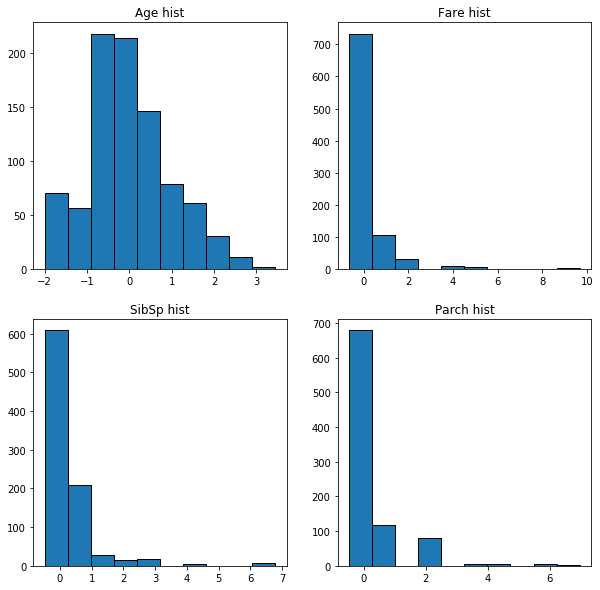

In [483]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].hist((df1['Age'] - np.mean(df1['Age'])) / np.std(df1['Age']), ec='black', bins=10)
ax[0][0].set_title('Age hist')

ax[0][1].hist((df1['Fare'] - np.mean(df1['Fare'])) / np.std(df1['Fare']), ec='black', bins=10)
ax[0][1].set_title('Fare hist')

ax[1][0].hist((df1['SibSp'] - np.mean(df1['SibSp'])) / np.std(df1['SibSp']), ec='black', bins=10)
ax[1][0].set_title('SibSp hist')

ax[1][1].hist((df1['Parch'] - np.mean(df1['Parch'])) / np.std(df1['Parch']), ec='black', bins=10)
ax[1][1].set_title('Parch hist')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Основные категориальные признаки - Sex и Embarked, оба эти признака задаются строкой. Тогда для признака Sex:
* если признак принимает значение male - новый признак будет принимать значение 1
* если признак принимает значение female - новый признак будет принимать значение 0

In [484]:
def sex(x):
    return int(x)

In [485]:
(df['Sex'] == 'male').apply(sex)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

При желании можно заменить этот признак в основном датафрейме (df['Sex'] = ...)

Для признака Embarked:
* 1, если в исходном был S
* 2, если C
* 3, если Q

In [486]:
df.replace(to_replace=['S', 'C', 'Q'], value=[1, 2, 3])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,38.0,1,2,23.4500,1,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1,1


# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

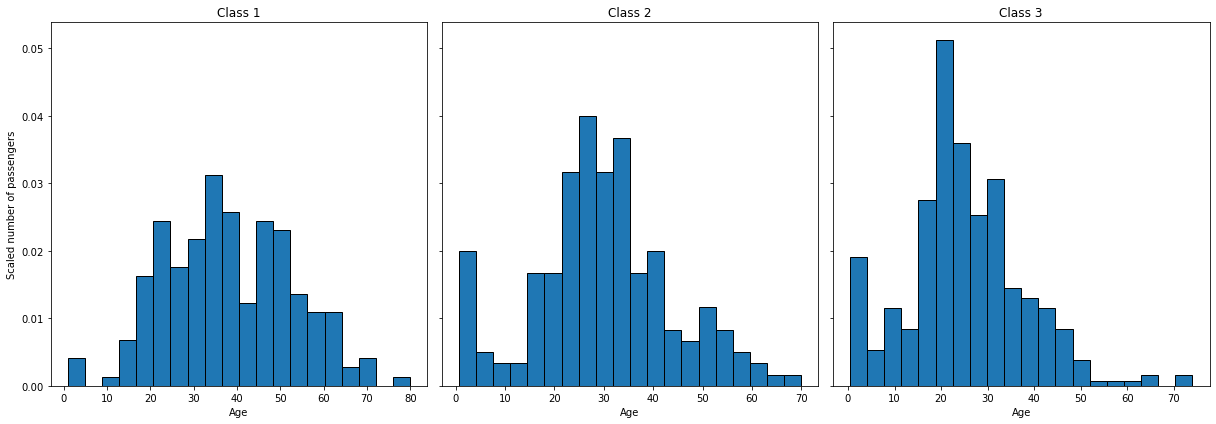

In [0]:
# В итоге ваш график должен получиться примерно таким:

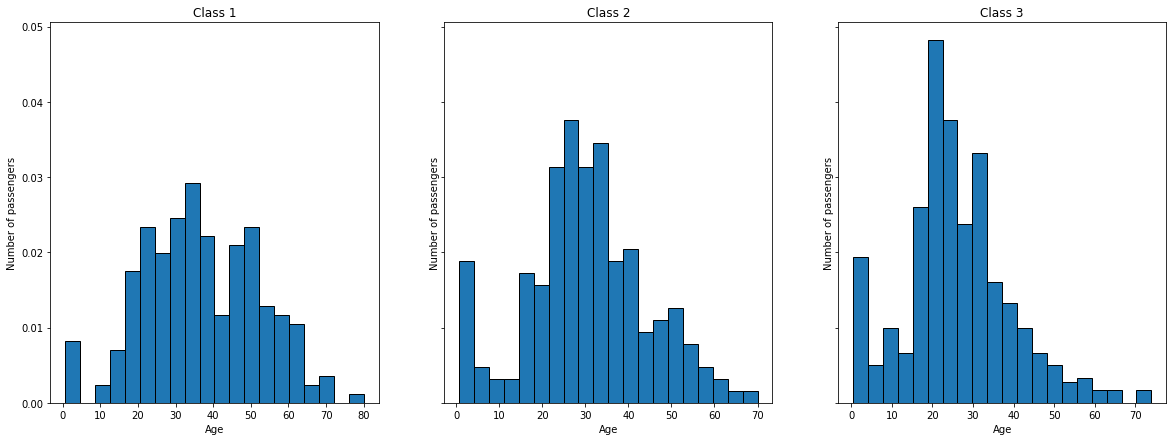

In [493]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(20,7))

ax[0].hist(df1[df1['Pclass'] == 1]['Age'], ec='black', bins=20, density=True)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of passengers')
ax[0].set_title('Class 1')

ax[1].hist(df1[df1['Pclass'] == 2]['Age'], ec='black', bins=20, density=True)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of passengers')
ax[1].set_title('Class 2')

ax[2].hist(df1[df1['Pclass'] == 3]['Age'], ec='black', bins=20, density=True)
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Number of passengers')
ax[2].set_title('Class 3')

plt.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

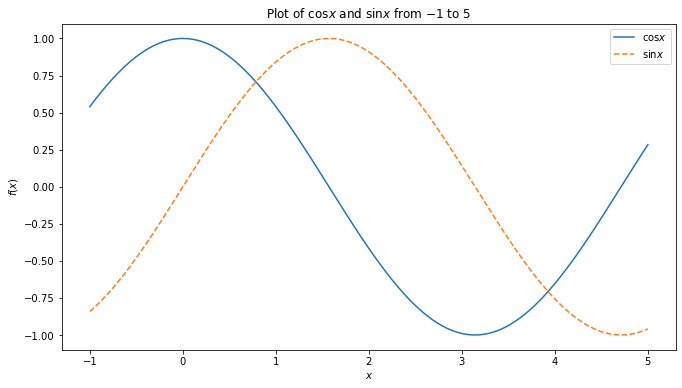

In [0]:
# В итоге ваш график должен получиться примерно таким:

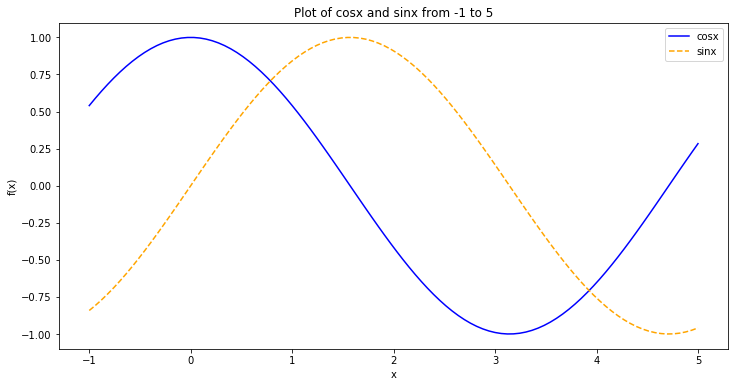

In [495]:
x = np.linspace(-1, 5, 100)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, np.cos(x), '-b', label='cosx')
ax.plot(x, np.sin(x), '--', color='orange', label='sinx')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of cosx and sinx from -1 to 5')
leg = ax.legend()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

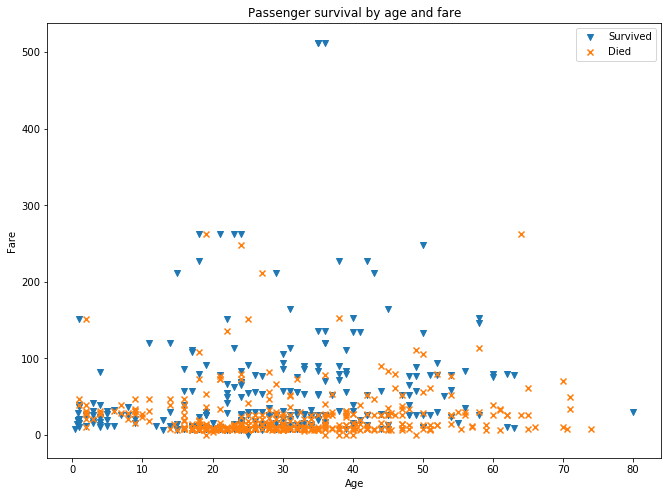

In [0]:
# В итоге ваш график должен получиться примерно таким:

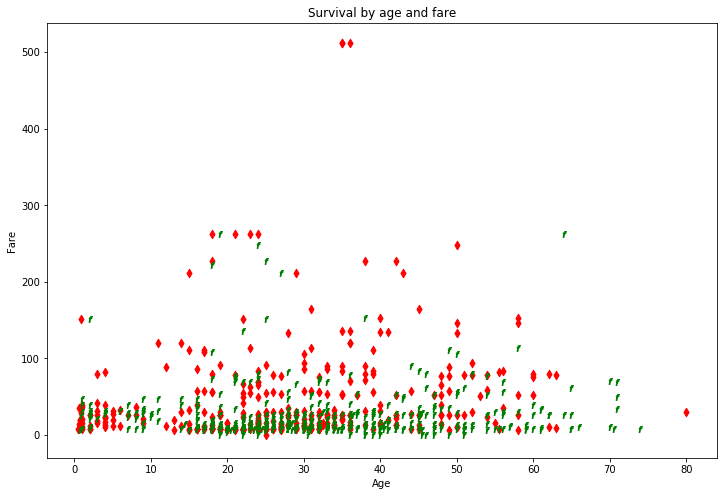

In [496]:
fig = plt.subplots(figsize=(12,8))
plt.scatter(df1[df1['Survived'] == 1]['Age'], df1[df1['Survived'] == 1]['Fare'], marker='d', color='red')
plt.scatter(df1[df1['Survived'] == 0]['Age'], df1[df1['Survived'] == 0]['Fare'], marker='$f$', color='green')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Survival by age and fare')
plt.show()